In [1]:
import numpy as np
import pandas as pd
import sympy as S
from scipy import stats

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
mpl.style.use('seaborn-darkgrid')
mpl.rcParams.update({'font.size': 18})

In [3]:
pd.options.display.max_rows = 10

## Logistic Regression

The Bernoulli distribution we studied earlier answers the question of which of
two outcomes ($Y \in \lbrace 0,1 \rbrace$) would be selected with probability,
$p$.

$$
\mathbb{P}(Y) = p^Y (1-p)^{ 1-Y }
$$

 We also know how to solve the corresponding likelihood function for
the maximum likelihood estimate of $p$ given observations of the output,
$\lbrace Y_i \rbrace_{i=1}^n$. However, now we want to include other factors in
our estimate of $p$. For example, suppose we observe not just the outcomes, but
a corresponding continuous variable, $x$. That is, the observed data is now
$\lbrace (x_i,Y_i) \rbrace_{i=1}^n$  How can we incorporate $x$ into our
estimation of $p$?

The most straightforward idea is to model $p= a x + b$ where $a,b$ are
parameters of a fitted line. However, because $p$ is a probability with value
bounded between zero and one, we need to wrap this estimate in another function
that can map the entire real line into the $[0,1]$ interval. The logistic
(a.k.a. sigmoid) function has this property,

$$
\theta(s) = \frac{e^s}{1+e^s}
$$

 Thus, the new parameterized estimate for $p$ is the following,

<!-- Equation labels as ordinary links -->
<div id="eq:prob"></div>

$$
\begin{equation}
\hat{p} = \theta(a x+b)= \frac{e^{a x + b}}{1+e^{a x + b}}
\label{eq:prob} \tag{1}
\end{equation}
$$

 This is usually expressed using the *logit* function,

$$
\texttt{logit}(t)= \log \frac{t}{1-t}
$$

 as,

$$
\texttt{logit}(p) = b + a x
$$

 More continuous variables can be accommodated easily as

$$
\texttt{logit}(p) = b + \sum_k a_k x_k
$$

 This can be further extended beyond the binary case to multiple
target labels. The maximum likelihood estimate of this uses
numerical optimization methods that are implemented in Scikit-learn.

Let's construct some data to see how this works. In the following, we assign
class labels to a set of randomly scattered points in the two-dimensional
plane,

In [5]:
v = 0.9


@np.vectorize
def gen_y(x):
    if x < 5: return np.random.choice([0, 1], p=[v, 1 - v])
    else: return np.random.choice([0, 1], p=[1 - v, v])


xi = np.sort(np.random.rand(500) * 10)
yi = gen_y(xi)

**Programming Tip.**

The `np.vectorize` decorator used in the code above makes it easy to avoid
looping in code that uses Numpy arrays by embedding the looping semantics
inside of the so-decorated function. Note, however, that this does not
necessarily accelerate the wrapped function. It's mainly for convenience.



[Figure](#fig:logreg_001) shows a scatter plot of the data we constructed in
the above code, $\lbrace (x_i,Y_i) \rbrace$. As constructed, it is more
likely that large values of $x$ correspond to $Y=1$. On the other hand, values
of $x \in [4,6]$ of either category are heavily overlapped. This means that $x$
is not a particularly strong indicator of $Y$ in this region.
[Figure](#fig:logreg_002) shows the fitted logistic regression curve against the
same
data. The points along the curve are the probabilities that each point lies in
either of the two categories. For large values of $x$ the curve is near one,
meaning that the probability that the associated $Y$ value is equal to one. On
the other extreme, small values of $x$ mean that this probability is close to
zero.  Because there are only two possible categories, this means that the
probability of $Y=0$ is thereby higher. The region in the middle corresponding
to the middle probabilities reflect the ambiguity between the two catagories
because of the overlap in the data for this region. Thus, logistic regression
cannot make a strong case for one category here.
The following code fits the logistic regression model,

Text(0,0.5,'$Y$')

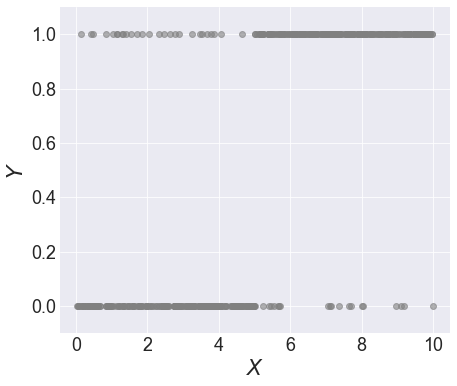

In [10]:
fig, ax = plt.subplots(figsize=(7,6))
ax.plot(xi, yi, 'o', color='gray', alpha=.6)
ax.axis(ymax=1.1, ymin=-0.1)
ax.set_xlabel(r'$X$', fontsize=22)
ax.set_ylabel(r'$Y$', fontsize=22)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(np.c_[xi], yi)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0,0.5,'$\\mathbb{P}(Y)$')

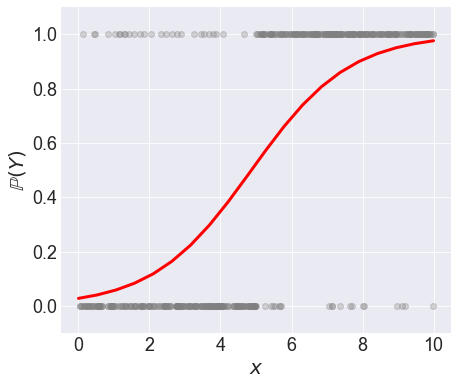

In [13]:
fig, ax = plt.subplots(figsize=(7,6))
xii = np.linspace(0, 10, 20)
ax.plot(xii, lr.predict_proba(np.c_[xii])[:, 1], 'r-', lw=3)
ax.plot(xi, yi, 'o', color='gray', alpha=.3)
ax.axis(ymax=1.1, ymin=-0.1)
ax.set_xlabel(r'$x$', fontsize=20)
ax.set_ylabel(r'$\mathbb{P}(Y)$', fontsize=20)

<!-- dom:FIGURE: [fig-machine_learning/logreg_001.png, width=500 frac=0.75]
This scatterplot shows the binary $Y$ variables and the corresponding $x$ data
for each category. <div id="fig:logreg_001"></div> -->
<!-- begin figure -->
<div id="fig:logreg_001"></div>

<p>This scatterplot shows the binary $Y$ variables and the corresponding $x$
data for each category.</p>
<img src="fig-machine_learning/logreg_001.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-machine_learning/logreg_002.png, width=500 frac=0.75]
This shows the fitted logistic regression on the data shown in
[Figure](#fig:logreg_001). The points along the curve are the probabilities that
each point lies in either of the two categories.  <div
id="fig:logreg_002"></div> -->
<!-- begin figure -->
<div id="fig:logreg_002"></div>

<p>This shows the fitted logistic regression on the data shown in
[Figure](#fig:logreg_001). The points along the curve are the probabilities that
each point lies in either of the two categories.</p>
<img src="fig-machine_learning/logreg_002.png" width=500>

<!-- end figure -->


For a deeper understanding of logistic regression, we need to alter our
notation slightly and once again use our projection methods. More generally we
can rewrite Equation [eq:prob](#eq:prob) as the following,

<!-- Equation labels as ordinary links -->
<div id="eq:probbeta"></div>

$$
\begin{equation}
p(\mathbf{x}) = \frac{1}{1+\exp(-\boldsymbol{\beta}^T \mathbf{x})}
\label{eq:probbeta} \tag{2}
\end{equation}
$$

 where $\boldsymbol{\beta}, \mathbf{x}\in \mathbb{R}^n$.  From our
prior work on projection we know that the signed perpendicular distance between
$\mathbf{x}$ and the linear boundary described by $\boldsymbol{\beta}$ is
$\boldsymbol{\beta}^T \mathbf{x}/\Vert\boldsymbol{\beta}\Vert$.  This means
that the probability that is assigned to any point in $\mathbb{R}^n$ is a
function of how close that point is to the linear boundary described by the
following equation,

$$
\boldsymbol{\beta}^T \mathbf{x} = 0
$$

 But there is something subtle hiding here. Note that
for any $\alpha\in\mathbb{R}$,

$$
\alpha\boldsymbol{\beta}^T \mathbf{x} = 0
$$

 describes the *same* hyperplane. This means that we can multiply
$\boldsymbol{\beta}$ by an arbitrary scalar and still get the same geometry.
However, because of $\exp(-\alpha\boldsymbol{\beta}^T \mathbf{x})$ in Equation
[eq:probbeta](#eq:probbeta), this scaling determines the intensity of the
probability
attributed to $\mathbf{x}$. This is illustrated in [Figure](#fig:logreg_003).
The panel on the left shows two categories (squares/circles) split by the
dotted line that is determined by $\boldsymbol{\beta}^T\mathbf{x}=0$. The
background colors shows the probabilities assigned to points in the plane.  The
right panel shows that by scaling with $\alpha$, we can increase the
probabilities of class membership for the given points, given the exact same
geometry. The points near the boundary have lower probabilities because they
could easily be on the opposite side.  However, by scaling by $\alpha$, we can
raise those probabilities to any desired level at the cost of driving the
points further from the boundary closer to one. Why is this a problem? By
driving the probabilities arbitrarily using $\alpha$, we can overemphasize the
training set at the cost of out-of-sample data. That is, we may wind up
insisting on emphatic class membership of yet unseen points that are close to
the boundary that otherwise would have more equivocal probabilities (say, near
$1/2$).  Once again, this is another manifestation of bias/variance trade-off.

<!-- dom:FIGURE: [fig-machine_learning/logreg_003.png, width=500 frac=1.25]
Scaling can arbitrarily increase the probabilities of points near the decision
boundary.   <div id="fig:logreg_003"></div> -->
<!-- begin figure -->
<div id="fig:logreg_003"></div>

<p>Scaling can arbitrarily increase the probabilities of points near the
decision boundary.</p>
<img src="fig-machine_learning/logreg_003.png" width=500>

<!-- end figure -->


Regularization is a method that controls this effect by penalizing the size of
$\beta$ as part of its solution. Algorithmically, logistic regression works by
iteratively solving a sequence of weighted least squares problems. Regression
adds a $\Vert\boldsymbol{\beta}\Vert/C$ term to the least squares error. To see
this in action, let's create some data from a logistic regression and see if we
can recover it using Scikit-learn. Let's start with a scatter of points in the
two-dimensional  plane,

In [99]:
x0, x1 = np.random.rand(2, 20) * 6 - 3
X = np.c_[x0, x1, x1 * 0 + 1]  # stack as columns

Note that `X` has a third column of all ones. This is a
trick to allow the corresponding line to be offset from the origin
in the two-dimensional plane. Next, we create a linear boundary
and assign the class probabilities according to proximity to the
boundary.

In [100]:
beta = np.array([1, -1, 1])  # last coordinate for affine offset
prd = X.dot(beta)
probs = 1 / (1 + np.exp(-prd / np.linalg.norm(beta)))
c = (prd > 0)  # boolean array class labels
c = (probs>0.5)

This establishes the training data.  The next block
creates the logistic regression object and fits the data.

In [101]:
import palettable

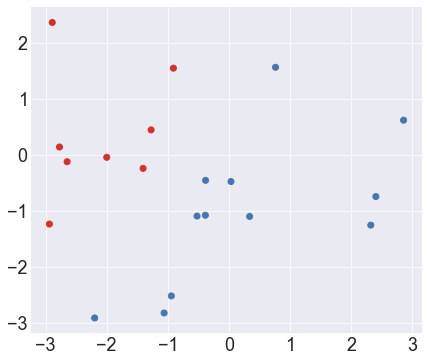

In [102]:
plt.figure(figsize=(7,6))
plt.scatter(X.T[0],X.T[1],c=c,cmap=palettable.colorbrewer.diverging.RdYlBu_9.mpl_colormap)

In [103]:
lr = LogisticRegression()
lr.fit(X[:,:-1],c)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Note that we have to omit the third dimension because of
how Scikit-learn internally breaks down the components of the
boundary. The resulting code extracts the corresponding
$\boldsymbol{\beta}$ from the `LogisticRegression` object.

In [104]:
betah = np.r_[lr.coef_.flat,lr.intercept_]

In [105]:
xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

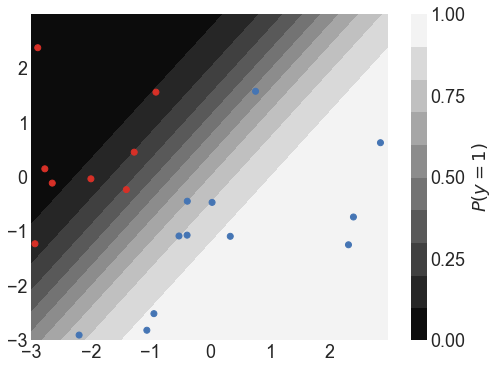

In [106]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 10, cmap="gray", vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(
    X.T[0],
    X.T[1],
    c=c,
    cmap=palettable.colorbrewer.diverging.RdYlBu_9.mpl_colormap)

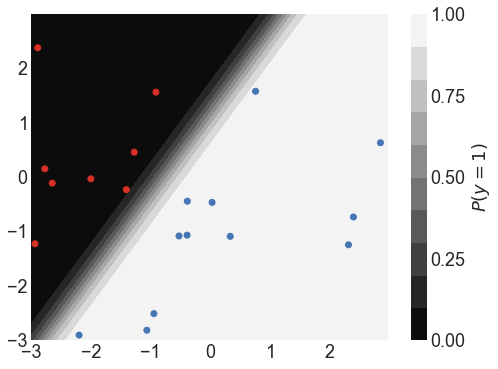

In [123]:
lr = LogisticRegression(C=100)
lr.fit(X[:,:-1],c)

xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 10, cmap="gray", vmin=0, vmax=1)

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(
    X.T[0],
    X.T[1],
    c=c,
    cmap=palettable.colorbrewer.diverging.RdYlBu_9.mpl_colormap)

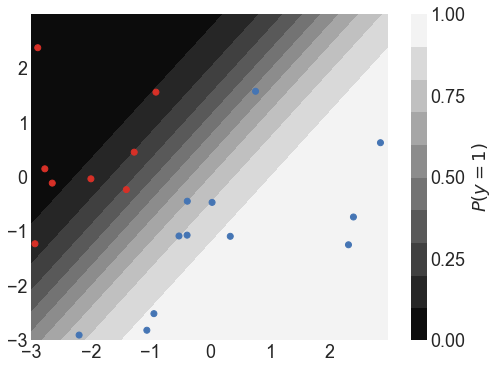

In [125]:
ret_plot(100)

In [126]:
def ret_plot(C):
    lr = LogisticRegression(C=C)
    lr.fit(X[:,:-1],c)

    xx, yy = np.mgrid[-3:3:.01, -3:3:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, 10, cmap="gray", vmin=0, vmax=1)

    ax_c = f.colorbar(contour)
    ax_c.set_label("$P(y = 1)$")
    ax_c.set_ticks([0, .25, .5, .75, 1])

    ax.scatter(
        X.T[0],
        X.T[1],
        c=c,
        cmap=palettable.colorbrewer.diverging.RdYlBu_9.mpl_colormap)

In [135]:
from ipywidgets import interact, FloatSlider

interact(ret_plot, C=FloatSlider(min=0.5,max=10,step=.5,value=0.5))

interactive(children=(FloatSlider(value=0.5, description='C', max=10.0, min=0.5, step=0.5), Output()), _dom_cl…

<function __main__.ret_plot(C)>

**Programming Tip.**

The Numpy `np.r_`  object provides a quick way to stack Numpy
arrays horizontally instead of using `np.hstack`.



 The resulting boundary is shown in the left panel in
[Figure](#fig:logreg_004). The crosses and triangles represent the two classes
we
created above, along with the separating gray line.  The logistic regression
fit produces the dotted black line. The dark circle is the point that logistic
regression categorizes incorrectly. The regularization parameter is $C=1$ by
default. Next, we can change the strength of the regularization parameter as in
the following,

In [10]:
lr = LogisticRegression(C=1000)

and the re-fit the data to produce the right panel in
[Figure](#fig:logreg_004). By increasing the regularization
parameter, we essentially nudged the fitting algorithm to
*believe* the data more than the general model. That is, by doing
this we accepted more variance in exchange for better bias.

<!-- dom:FIGURE: [fig-machine_learning/logreg_004.png, width=500 frac=1.25]  The
left panel shows the resulting boundary (dashed line) with $C=1$ as the
regularization parameter. The right panel is for $C=1000$. The gray line is the
boundary used to assign the class membership for the synthetic data. The dark
circle is the point that logistic regression categorizes incorrectly. <div
id="fig:logreg_004"></div> -->
<!-- begin figure -->
<div id="fig:logreg_004"></div>

<p>The left panel shows the resulting boundary (dashed line) with $C=1$ as the
regularization parameter. The right panel is for $C=1000$. The gray line is the
boundary used to assign the class membership for the synthetic data. The dark
circle is the point that logistic regression categorizes incorrectly.</p>
<img src="fig-machine_learning/logreg_004.png" width=500>

<!-- end figure -->


## Generalized Linear Models

Logistic regression is one example of a wider class of generalized linear
models that embed non-linear transformations in the fitting process. Let's back
up and break down logistic regression into smaller parts. As usual, we want to
estimate the conditional expectation $\mathbb{E}(Y\vert X=\mathbf{x})$.  For
plain linear regression, we have the following approximation,

$$
\mathbb{E}(Y\vert X=\mathbf{x})\approx\boldsymbol{\beta}^T\mathbf{x}
$$

 For notation sake, we call $r(x):=\mathbb{E}(Y\vert X=\mathbf{x})$
the response. For logistic regression, because $Y\in\left\{0,1\right\}$, we
have $\mathbb{E}(Y\vert X=\mathbf{x})=\mathbb{P}(Y\vert X=\mathbf{x})$ and the
transformation makes $r(\mathbf{x})$ linear.

$$
\begin{align*}
\eta(\mathbf{x}) &= \boldsymbol{\beta}^T\mathbf{x}     \\\
        &= \log \frac{r(\mathbf{x})}{1-r(\mathbf{x})}  \\\
        &= g(r(\mathbf{x}))
\end{align*}
$$

 where $g$ is defined as the logistic *link* function.
The $\eta(x)$ function is the linear predictor. Now that we have
transformed the original data space using the logistic function to
create the setting for the linear predictor, why don't we just do
the same thing for the $Y_i$ data? That is, for plain linear
regression, we usually take data, $\left\{X_i,Y_i\right\}$ and
then use it to fit an approximation to $\mathbb{E}(Y\vert X=x)$.
If we are transforming the conditional expectation using the
logarithm, which we are approximating using $Y_i$, then why don't
we correspondingly transform the binary $Y_i$ data? The answer is
that if we did so then we would get the logarithm of zero (i.e.,
infinity) or one (i.e., zero), which is not workable. The
alternative is to use a linear Taylor approximation, like we did
earlier with the delta method, to expand the $g$ function around
$r(x)$, as in the following,

$$
\begin{align*}
g(Y) &\approx \log\frac{r(x)}{1-r(x)} + \frac{Y-r(x)}{r(x)-r(x)^2} \\\
     &= \eta(x)+ \frac{Y-r(x)}{r(x)-r(x)^2}
\end{align*}
$$

 The interesting part is the $Y-r(x)$ term, because this is where the
class label data enters the problem. The expectation $\mathbb{E}(Y-r(x)\vert
X)=0$ so we can think of this differential as additive noise that dithers
$\eta(x)$. The variance of $g(Y)$ is the following,

$$
\begin{align*}
\mathbb{V}(g(Y)\vert X)&= \mathbb{V}(\eta(x)\vert X)+\frac{1}{(r(x)(1-r(x)))^2}
\mathbb{V}(Y-r(x)\vert X) \\\
                       &=\frac{1}{(r(x)(1-r(x)))^2} \mathbb{V}(Y-r(x)\vert X)
\end{align*}
$$

 Note that $\mathbb{V}(Y\vert X)=r(x)(1-r(x))$ because $Y$ is
a binary variable. Ultimately, this boils down to the following,

$$
\mathbb{V}(g(Y)\vert X)=\frac{1}{r(x)(1-r(x))}
$$

 Note that the variance is a function of $x$, which means it is
*heteroskedastic*, meaning that the iterative minimum-variance-finding
algorithm that computes $\boldsymbol{\beta}$ downplays $x$ where $r(x)\approx
0$ and $r(x)\approx 1$ because the peak of the variance occurs where
$r(x)\approx 0.5$, which are those equivocal points are close to the boundary.


For generalized linear models, the above sequence is the same and consists of
three primary ingredients: the linear predictor ($\eta(x)$), the link function
($g(x)$), and the *dispersion scale function*, $V_{ds}$ such that
$\mathbb{V}(Y\vert X)=\sigma^2 V_{ds}(r(x))$. For logistic regression, we have
$V_{ds}(r(x))=r(x)(1-r(x))$ and $\sigma^2=1$. Note that absolute knowledge of
$\sigma^2$ is not important because the iterative algorithm needs only a
relative proportional scale. To sum up, the iterative algorithm takes a linear
prediction for $\eta(x_i)$, computes the transformed responses, $g(Y_i)$,
calculates the weights $w_i=\left[(g^\prime(r(x_i))V_{ds}(r(x_i)))
\right]^{-1}$, and then does a weighted linear regression of $g(y_i)$ onto
$x_i$ with the weights $w_i$ to compute the next $\boldsymbol{\beta}$.
More details can be found in the following [[fox2015applied]](#fox2015applied),
[[lindsey1997applying]](#lindsey1997applying),
[[campbell2009generalized]](#campbell2009generalized).


<!-- # *Applied Predictive Modeling by Kuhn*, p. 283, -->
<!-- # Logit function, odds ratio -->
<!-- # *generalized linear models by Rodriguez*, p.72 -->
<!-- # *Scikit-learn cookbook*, p.78 -->

## Regularization

We have referred to regularization in earlier sections, but we
want to develop this important idea more fully. Regularization is
the mechanism by which we navigate the bias/variance trade-off.
To get started, let's consider a classic constrained least
squares problem,

$$
\begin{aligned}
& \underset{\mathbf{x}}{\text{minimize}}
& & \Vert\mathbf{x}\Vert_2^2 \\
& \text{subject to:}
& & x_0 + 2 x_1 = 1
\end{aligned}
$$

 where $\Vert\mathbf{x}\Vert_2=\sqrt{x_0^2+x_1^2}$ is the
$L_2$ norm.  Without the constraint, it would be easy to minimize
the objective function --- just take $\mathbf{x}=0$. Otherwise,
suppose we somehow know  that $\Vert\mathbf{x}\Vert_2<c$, then
the locus of points defined by this inequality is the circle in
[Figure](#fig:regularization_001). The constraint is the line in
the same figure. Because every value of $c$ defines a circle, the
constraint is satisfied  when the circle touches the line. The
circle can touch the line at many different points, but we are
only interested in the smallest such circle because this is a
minimization problem.  Intuitively, this means that we *inflate* a
$L_2$  ball at the origin and stop when it just touches the
contraint.  The point of contact is our $L_2$ minimization
solution.

<!-- dom:FIGURE: [fig-machine_learning/regularization_001.png, width=500
frac=0.75] The solution of the constrained $L_2$ minimization problem is at the
point where the constraint (dark line) intersects the $L_2$ ball (gray circle)
centered at the origin. The point of intersection is indicated by the dark
circle. The two neighboring squares indicate points on the line that are close
to the solution. <div id="fig:regularization_001"></div> -->
<!-- begin figure -->
<div id="fig:regularization_001"></div>

<p>The solution of the constrained $L_2$ minimization problem is at the point
where the constraint (dark line) intersects the $L_2$ ball (gray circle)
centered at the origin. The point of intersection is indicated by the dark
circle. The two neighboring squares indicate points on the line that are close
to the solution.</p>
<img src="fig-machine_learning/regularization_001.png" width=500>

<!-- end figure -->



We can obtain the same result using the method of Lagrange
multipliers. We can rewrite the entire $L_2$ minimization problem
as one objective function using the Lagrange multiplier,
$\lambda$,

$$
J(x_0,x_1,\lambda) = x_0^2+x_1^2 + \lambda (1-x_0-x_1)
$$

 and solve this as an ordinary function using calculus. Let's
do this using Sympy.

In [136]:
import sympy as S
S.var('x:2 l',real=True)
J=S.Matrix([x0,x1]).norm()**2 + l*(1-x0-2*x1)
sol=S.solve(map(J.diff,[x0,x1,l]))
print(sol)

{l: 2/5, x0: 1/5, x1: 2/5}


**Programming Tip.**

Using  the `Matrix` object is overkill for this problem but it
does demonstrate how Sympy's matrix machinery works. In this case,
we are using the `norm` method to compute the $L_2$  norm of the
given elements. Using `S.var` defines Sympy variables and injects
them into the global namespace. It is more Pythonic to do
something like `x0 = S.symbols('x0',real=True)` instead but the
other way is quicker, especially for variables with many
dimensions.



 The solution defines the exact point where the line is
tangent to the circle in [Figure](#fig:regularization_001).  The
Lagrange multiplier has incorporated the constraint into the objective
function.

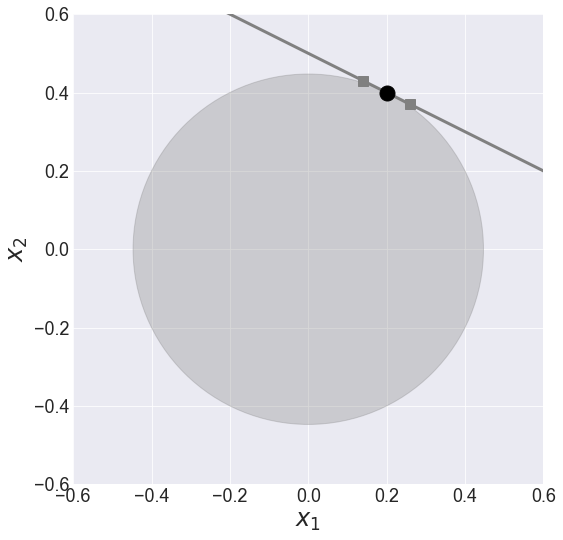

In [138]:
from numpy import pi, linspace, sqrt
from matplotlib.patches import Circle

x1 = linspace(-1, 1, 10)
dx = linspace(.7, 1.3, 3)
fline = lambda x: (1 - x) / 2.

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(dx * 1 / 5, fline(dx * 1 / 5), 's', ms=10, color='gray')
ax.plot(x1, fline(x1), color='gray', lw=3)
ax.add_patch(Circle((0, 0), 1 / sqrt(5), alpha=0.3, color='gray'))
ax.plot(1 / 5, 2 / 5, 'o', color='k', ms=15)
ax.set_xlabel('$x_1$', fontsize=24)
ax.set_ylabel('$x_2$', fontsize=24)
ax.axis((-0.6, 0.6, -0.6, 0.6))
ax.set_aspect(1)

fig.tight_layout()

There is something subtle and very important about the nature of the solution,
however. Notice that there are other points very close to the solution on the
circle, indicated by the squares in [Figure](#fig:regularization_001). This
closeness could be a good thing, in case it helps us actually find a solution
in the first place, but it may be unhelpful in so far as it creates ambiguity.
Let's hold that thought and try the same problem using the $L_1$ norm instead
of the $L_2$ norm. Recall that

$$
\Vert \mathbf{x}\Vert_1 = \sum_{i=1}^d \vert x_i \vert
$$

 where $d$ is the dimension of the vector $\mathbf{x}$. Thus, we can
reformulate the same problem in the $L_1$  norm as in the following,

$$
\begin{aligned}
& \underset{\mathbf{x}}{\text{minimize}}
& & \Vert\mathbf{x}\Vert_1 \\
& \text{subject to:}
& & x_1 + 2 x_2 = 1
\end{aligned}
$$

  It turns out that this problem is somewhat harder to
solve using Sympy, but we have convex optimization modules in Python
that can help.

In [143]:
from cvxpy import Variable, Problem, Minimize, norm1
x=Variable(2,1,name='x')
constr=[np.matrix([[1,2]])*x==1]
obj=Minimize(norm1(x))
p= Problem(obj,constr)
p.solve()
print(x.value)

TypeError: __init__() got multiple values for argument 'name'

**Programming Tip.**

The `cvxy` module provides a unified and accessible interface to the powerful
`cvxopt` convex optimization package, as well as other open-source solver
packages.



 As shown in [Figure](#fig:regularization_002), the constant-norm
contour in the $L_1$ norm is shaped like a diamond instead of a circle.
Furthermore, the solutions found in each case are different.  Geometrically,
this is because inflating the circular $L_2$ reaches out in all directions
whereas the $L_1$ ball creeps out along the principal axes.  This effect is
much more pronounced in higher dimensional spaces where $L_1$-balls get more
spikey  [^spikey].  Like the $L_2$ case, there are also neighboring points on
the constraint line, but notice that these are not close to the boundary of the
corresponding $L_1$ ball, as they were in the $L_2$ case.  This means that
these would be harder to confuse with the optimal solution because they
correspond to a substantially different $L_1$ ball.

[^spikey]: We discussed the geometry of high dimensional space
when we covered the curse of dimensionality in the
statistics chapter.

To double-check our earlier $L_2$ result, we can also use the
`cvxpy` module to find the $L_2$ solution as in the following
code,

In [ ]:
constr=[np.matrix([[1,2]])*x==1]
obj=Minimize(norm2(x)) #L2 norm
p= Problem(obj,constr)
p.solve()
print(x.value)

The only change to the code is the $L_2$ norm and we get
the same solution as before.

Let's see what happens in higher dimensions for both $L_2$ and
$L_1$ as we move from two dimensions to four dimensions.

In [ ]:
x=Variable(4,1,name='x')
constr=[np.matrix([[1,2,3,4]])*x==1]
obj=Minimize(norm1(x))
p= Problem(obj,constr)
p.solve()
print(x.value)

And also in the $L_2$ case with the following code,

In [ ]:
constr=[np.matrix([[1,2,3,4]])*x==1]
obj=Minimize(norm2(x))
p= Problem(obj,constr)
p.solve()
print(x.value)

Note that the $L_1$ solution has selected out only one
dimension for the solution, as the other components are
effectively zero. This is not so with the $L_2$ solution, which
has meaningful elements in multiple coordinates.  This is because
the $L_1$ problem has many pointy corners in the four dimensional
space that poke at the hyperplane that is defined by the
constraint. This essentially means the subsets (namely, the points
at the corners) are found as solutions because these touch the
hyperplane. This effect becomes more pronounced in higher
dimensions, which is the main benefit of using the $L_1$ norm
as we will see in the next section.

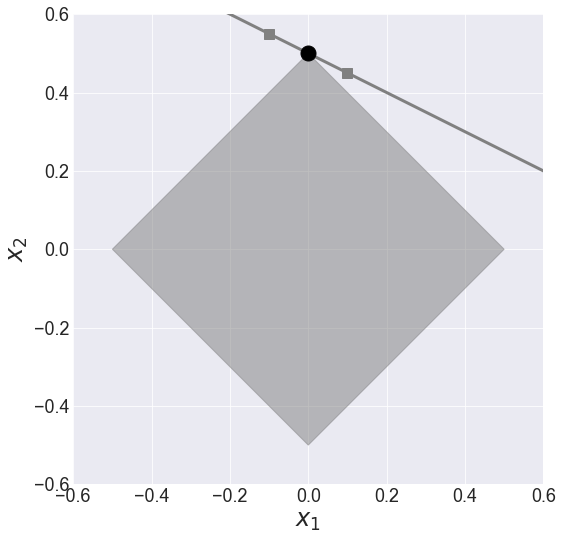

In [144]:
from matplotlib.patches import Rectangle, RegularPolygon

r = RegularPolygon((0, 0), 4, 1 / 2, pi / 2, alpha=0.5, color='gray')
fig, ax = plt.subplots(figsize=(8, 8))
dx = np.array([-0.1, 0.1])
ax.plot(dx, fline(dx), 's', ms=10, color='gray')
ax.plot(x1, fline(x1), color='gray', lw=3)
ax.plot(0, 1 / 2, 'o', color='k', ms=15)
ax.add_patch(r)
ax.set_xlabel('$x_1$', fontsize=24)
ax.set_ylabel('$x_2$', fontsize=24)
ax.axis((-0.6, 0.6, -0.6, 0.6))
ax.set_aspect(1)
fig.tight_layout()

<!-- dom:FIGURE: [fig-machine_learning/regularization_002.png, width=500
frac=0.75] The diamond is the $L_1$ ball in two dimensions and the line is the
constraint. The point of intersection is the solution to the optimization
problem. Note that for $L_1$ optimization, the two nearby points on the
constraint (squares) do not touch the $L_1$ ball. Compare this with
[Figure](#fig:regularization_001). <div id="fig:regularization_002"></div> -->
<!-- begin figure -->
<div id="fig:regularization_002"></div>

<p>The diamond is the $L_1$ ball in two dimensions and the line is the
constraint. The point of intersection is the solution to the optimization
problem. Note that for $L_1$ optimization, the two nearby points on the
constraint (squares) do not touch the $L_1$ ball. Compare this with
[Figure](#fig:regularization_001).</p>
<img src="fig-machine_learning/regularization_002.png" width=500>

<!-- end figure -->


## Ridge Regression

Now that we have a sense of the geometry of the situation, let's revisit
our classic linear regression probem. To recap, we want to solve the following
problem,

$$
\min_{\boldsymbol{\beta}\in \mathbb{R}^p} \Vert y -
\mathbf{X}\boldsymbol{\beta}\Vert
$$

 where $\mathbf{X}=\left[
\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_p \right]$ and $\mathbf{x}_i\in
\mathbb{R}^n$. Furthermore, we assume that the $p$ column vectors are linearly
independent (i.e., $\texttt{rank}(\mathbf{X})=p$). Linear regression produces
the $\boldsymbol{\beta}$ that minimizes the mean squared error above.  In the
case where $p=n$, there is a unique solution to this problem. However, when
$p<n$, then there are infinitely many solutions.

To make this concrete, let's work this out using Sympy. First,
let's define an example $\mathbf{X}$ and $\mathbf{y}$ matrix,

In [145]:
import sympy as S
from sympy import Matrix
X = Matrix([[1, 2, 3], [3, 4, 5]])
y = Matrix([[1, 2]]).T

In [148]:
X

Matrix([
[1, 2, 3],
[3, 4, 5]])

In [149]:
y

Matrix([
[1],
[2]])

Now, we can define our coefficient vector $\boldsymbol{\beta}$
using the following code,

In [150]:
b0, b1, b2 = S.symbols('b:3', real=True)
beta = Matrix([[b0, b1, b2]]).T  # transpose

In [153]:
beta

Matrix([
[b0],
[b1],
[b2]])

Next, we define the objective function we are trying to minimize

In [151]:
obj = (X * beta - y).norm(ord=2)**2

In [154]:
obj

(b0 + 2*b1 + 3*b2 - 1)**2 + (3*b0 + 4*b1 + 5*b2 - 2)**2

**Programming Tip.**

The Sympy `Matrix` class has useful methods like the `norm` function
used above to define the objective function. The `ord=2` means we want
to use the $L_2$ norm. The expression in parenthesis evaluates to a
`Matrix` object.



 Note that it is helpful to define real variables using
the keyword argument whenever applicable because it relieves
Sympy's internal machinery of dealing with complex numbers.
Finally, we can use calculus to solve this by setting the
derivatives of the objective function to zero.

In [169]:
[obj.diff(i) for i in beta]

[20*b0 + 28*b1 + 36*b2 - 14,
 28*b0 + 40*b1 + 52*b2 - 20,
 36*b0 + 52*b1 + 68*b2 - 26]

In [155]:
sol = S.solve([obj.diff(i) for i in beta])
beta.subs(sol)

Matrix([
[         b2],
[-2*b2 + 1/2],
[         b2]])

Notice that the solution does not uniquely specify all the components
of the `beta` variable. This is a consequence of the $p>n$ nature of this
problem where $p=3$ and $n=2$.  While the the existence of this ambiguity does
not alter the solution,

In [172]:
sol

{b1: -2*b2 + 1/2, b0: b2}

In [170]:
obj.subs(sol)

0

But it does change the length of the solution vector
`beta`,

In [157]:
beta.subs(sol).norm(2)

sqrt(2*b2**2 + (2*b2 - 1/2)**2)

If we want to minimize this length we can easily
use the same calculus as before,

In [173]:
S.solve((beta.subs(sol).norm()**2).diff())

[1/6]

This provides the solution of minimum length
in the $L_2$ sense,

In [174]:
betaL2 = beta.subs(sol).subs(b2, S.Rational(1, 6))
betaL2

Matrix([
[1/6],
[1/6],
[1/6]])

But what is so special about solutions of minimum length? For machine
learning, driving the objective function to zero is symptomatic of overfitting
the data. Usually, at the zero bound, the machine learning method has
essentially memorized the training data, which is bad for generalization. Thus,
we can effectively stall this problem by defining a region for the solution
that is away from the zero-bound.

$$
\begin{aligned}
& \underset{\boldsymbol{\beta}}{\text{minimize}}
& & \Vert y - \mathbf{X}\boldsymbol{\beta}\Vert_2^2 \\
& \text{subject to:}
& & \Vert\boldsymbol{\beta}\Vert_2 < c
\end{aligned}
$$

 where $c$ is the tuning parameter. Using the same process as before,
we can re-write this as the following,

$$
\min_{\boldsymbol{\beta}\in\mathbb{R}^p}\Vert
y-\mathbf{X}\boldsymbol{\beta}\Vert_2^2 +\alpha\Vert\boldsymbol{\beta}\Vert_2^2
$$

 where $\alpha$ is the tuning parameter. These are the *penalized* or
Lagrange forms of these problems derived from the constrained versions. The
objective function is penalized by the $\Vert\boldsymbol{\beta}\Vert_2$ term.
For $L_2$ penalization, this is called *ridge* regression.    This is
implemented in Scikit-learn as `Ridge`. The following code sets this up for
our example,

In [162]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=100.0,fit_intercept=False)
clf.fit(np.array(X).astype(float),np.array(y).astype(float))

Ridge(alpha=100.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Note that the `alpha` scales of the penalty for the
$\Vert\boldsymbol{\beta}\Vert_2$. We set the `fit_intercept=False` argument to
omit the extra offset term from our example. The corresponding solution is the
following,

In [163]:
print(clf.coef_)

[[0.0428641  0.06113005 0.07939601]]


To double-check the solution, we can use some optimization tools from
Scipy and our previous Sympy analysis, as in the following,

In [181]:
from scipy.optimize import minimize
f = S.lambdify((b0, b1, b2), obj + beta.norm()**2 * 100.) #variar o alpha para dizer o que ocorre.
g = lambda x: f(x[0], x[1], x[2])
out = minimize(g, [.1, .2, .3])  # initial guess
out.x

array([0.0428641 , 0.06113005, 0.07939601])

**Programming Tip.**

We had to define the additional `g` function from the lambda function we
created from the Sympy expression in `f` because the `minimize` function
expects a single object vector as input instead of a three separate arguments.



 which produces the same answer as the `Ridge` object. To
better understand the meaning of this result, we can re-compute the
mean squared error solution to this problem in one step using matrix
algebra instead of calculus,

In [176]:
X

Matrix([
[1, 2, 3],
[3, 4, 5]])

In [177]:
betaLS = X.T * (X * X.T).inv() * y
betaLS

Matrix([
[1/6],
[1/6],
[1/6]])

Notice that this solves the posited problem exactly,

In [178]:
X * betaLS - y

Matrix([
[0],
[0]])

This means that the first term in the objective function
goes to zero,

$$
\Vert y-\mathbf{X}\boldsymbol{\beta}_{LS}\Vert=0
$$

 But, let's examine the $L_2$ length of this solution versus
the ridge regression solution,

In [179]:
clf.coef_

array([[0.0428641 , 0.06113005, 0.07939601]])

In [167]:
print(betaLS.norm().evalf(), np.linalg.norm(clf.coef_))

0.288675134594813 0.10898596412575512


Thus, the ridge regression solution is shorter in the $L_2$
sense, but the first term in the objective function is not zero for
ridge regression,

In [182]:
print((y-X*clf.coef_.T).norm()**2)

1.86870864136429


Ridge regression solution trades fitting error
($\Vert y-\mathbf{X} \boldsymbol{\beta}\Vert_2$) for solution
length ($\Vert\boldsymbol{\beta}\Vert_2$).

Let's see this in action with a familiar example from
[ch:stats:sec:nnreg](#ch:stats:sec:nnreg).  Consider
[Figure](#fig:regularization_003).
For this example, we created our usual chirp signal and attempted to
fit it with a high-dimensional polynomial, as we did in
the section [ch:ml:sec:cv](#ch:ml:sec:cv).  The lower panel is the same except
with ridge
regression. The shaded gray area is the space between the true signal
and the approximant in both cases. The horizontal hash marks indicate
the subset of $x_i$ values that each regressor was trained on.
Thus, the training set represents a non-uniform sample of the
underlying chirp waveform.  The top panel shows the usual polynomial
regression. Note that the regressor fits the given points extremely
well, but fails at the endpoint. The ridge regressor misses many of
the points in the middle, as indicated by the gray area, but does not
overshoot at the ends as much as the plain polynomial regression. This
is the basic trade-off for ridge regression. The Jupyter/IPython
notebook has the code for this graph, but the main steps
are shown in the following,

In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [213]:
# create chirp signal
np.random.seed(1234567)
xi = np.linspace(0,1,100)[:,None]
# sample chirp randomly
xin= np.sort(np.random.choice(xi.flatten(),20,replace=False))[:,None]
# create sampled waveform
y = np.cos(2*pi*(xin+xin**2))
# create full waveform for reference
yi = np.cos(2*pi*(xi+xi**2))

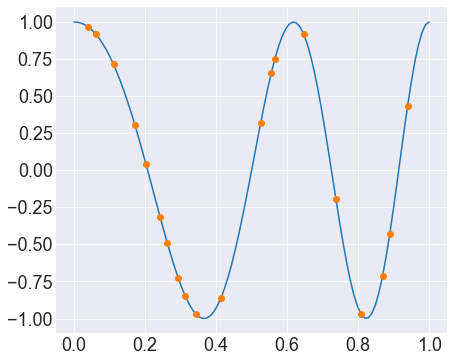

In [214]:
plt.figure(figsize=(7,6))
plt.plot(xi,yi)
plt.plot(xin,y,'o')

In [215]:
# create polynomial features
qfit = PolynomialFeatures(degree=8) # quadratic

qfit.fit_transform([[2]])

array([[  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256.]])

In [241]:
Xq = qfit.fit_transform(xin)
# reformat input as polynomial
Xiq = qfit.fit_transform(xi)

lr = LinearRegression()  # create linear model
lr.fit(Xq, y)  # fit linear model

# create ridge regression model and fit
clf = Ridge(alpha=1e-9, fit_intercept=False)
clf.fit(Xq, y)

Ridge(alpha=1e-09, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

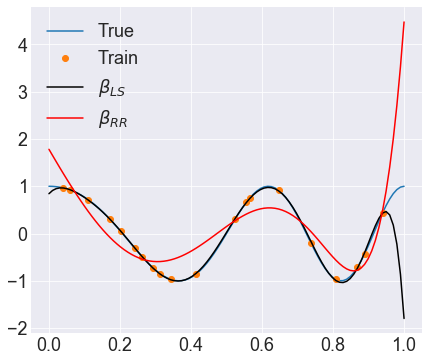

In [240]:
plt.figure(figsize=(7, 6))
plt.plot(xi, yi, label='True')
plt.plot(xin, y, 'o', label='Train')
plt.plot(xi, lr.predict(Xiq), label=r'$\beta_{LS}$', color='k')
plt.plot(xi, clf.predict(Xiq), label=r'$\beta_{RR}$', color='r')
plt.legend()

In [243]:
from sklearn.linear_model import RidgeCV
clf_cv = RidgeCV(alphas=np.logspace(-8,1,1000))
clf_cv.fit(Xq, y)
clf_cv.alpha_

4.45295850994266e-05

<!-- dom:FIGURE: [fig-machine_learning/regularization_003.png, width=500
frac=0.85] The top figure shows polynomial regression and the lower panel shows
polynomial ridge regression. The ridge regression does not match as well
throughout most of the domain, but it does not flare as violently at the ends.
This is because the ridge constraint holds the coefficient vector down at the
expense of poorer performance along the middle of the domain. <div
id="fig:regularization_003"></div> -->
<!-- begin figure -->
<div id="fig:regularization_003"></div>

<p>The top figure shows polynomial regression and the lower panel shows
polynomial ridge regression. The ridge regression does not match as well
throughout most of the domain, but it does not flare as violently at the ends.
This is because the ridge constraint holds the coefficient vector down at the
expense of poorer performance along the middle of the domain.</p>
<img src="fig-machine_learning/regularization_003.png" width=500>

<!-- end figure -->


## Lasso

Lasso regression follows the same basic pattern as ridge regression,
except with the $L_1$ norm in the objective function.

$$
\min_{\boldsymbol{\beta}\in\mathbb{R}^p}\Vert
y-\mathbf{X}\boldsymbol{\beta}\Vert^2 +\alpha\Vert\boldsymbol{\beta}\Vert_1
$$

 The interface in Scikit-learn is likewise the same.
The following is the same problem as before using lasso
instead of ridge regression,

In [244]:
X = np.matrix([[1,2,3],
               [3,4,5]])
y = np.matrix([[1,2]]).T

from sklearn.linear_model import Lasso

lr = Lasso(alpha=1.0,fit_intercept=False)
lr.fit(X,y)
print(lr.coef_)

[0.         0.         0.32352941]


As before, we can use the optimization tools in Scipy to solve this
also,

In [245]:
from scipy.optimize import fmin
obj = 1/4.*(X*beta-y).norm(2)**2 + beta.norm(1)*l
f = S.lambdify((b0,b1,b2),obj.subs(l,1.0))
g = lambda x:f(x[0],x[1],x[2])
fmin(g,[0.1,0.2,0.3])

Optimization terminated successfully.
         Current function value: 0.360297
         Iterations: 121
         Function evaluations: 221


array([2.27469304e-06, 4.02831864e-06, 3.23134859e-01])

**Programming Tip.**

The `fmin` function from Scipy's optimization module uses an
algorithm that does not depend upon derivatives. This is useful
because, unlike the $L_2$ norm, the $L_1$ norm has sharp corners
that make it harder to estimate derivatives.



 This result matches the previous one from the
Scikit-learn `Lasso` object. Solving it using Scipy is motivating
and provides a good sanity check, but specialized algorithms are
required in practice. The following code block re-runs the lasso
with varying $\alpha$ and plots the coefficients in
[Figure](#fig:regularization_004). Notice that as $\alpha$ increases, all
but one of the coefficients is driven to zero. Increasing $\alpha$
makes the trade-off between fitting the data in the $L_2$ sense
and wanting to reduce the number of nonzero coefficients
(equivalently, the number of features used) in the model. For a
given problem, it may be more practical to focus on reducing the
number of features in the model (i.e., large $\alpha$) than the
quality of the data fit in the training data. The lasso provides a
clean way to navigate this trade-off.

The following code loops over a set of $\alpha$ values and
collects the corresponding lasso coefficients to be plotted
in [Figure](#fig:regularization_004)

In [249]:
o = []
alphas = np.logspace(-3, 2, 50)
for a in alphas:
    clf = Lasso(alpha=a, fit_intercept=False)
    clf.fit(X, y)
    o.append(clf.coef_)

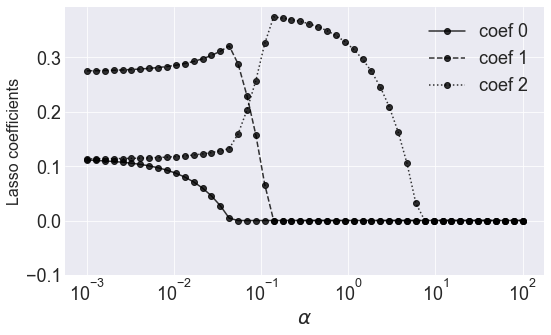

In [250]:
fig, ax = plt.subplots()
fig.set_size_inches((8, 5))
k = np.vstack(o)
ls = ['-', '--', ':', '-.']
for i in range(k.shape[1]):
    _ = ax.semilogx(
        alphas,
        k[:, i],
        'o-',
        label='coef %d' % (i),
        color='k',
        ls=ls[i],
        alpha=.8,
    )

_ = ax.axis(ymin=-1e-1)
_ = ax.legend(loc=0)
_ = ax.set_xlabel(r'$\alpha$', fontsize=20)
_ = ax.set_ylabel(r'Lasso coefficients', fontsize=16)
fig.tight_layout()

<!-- dom:FIGURE: [fig-machine_learning/regularization_004.png, width=500
frac=0.85] As $\alpha$ increases, more of the model coefficients are driven to
zero for lasso regression.  <div id="fig:regularization_004"></div> -->
<!-- begin figure -->
<div id="fig:regularization_004"></div>

<p>As $\alpha$ increases, more of the model coefficients are driven to zero for
lasso regression.</p>
<img src="fig-machine_learning/regularization_004.png" width=500>

<!-- end figure -->

## Elastic net regularization

The elastic net is a regularized regression method that linearly combines the $L_1$ and $L_2$ penalties of the lasso and ridge methods.

$$
\min_{\boldsymbol{\beta}\in\mathbb{R}^p}\Vert
y-\mathbf{X}\boldsymbol{\beta}\Vert^2 +\alpha_1 \Vert\boldsymbol{\beta}\Vert_1 +\alpha_2 \Vert\boldsymbol{\beta}\Vert_2^2
$$
or
$$
\min_{\boldsymbol{\beta}\in\mathbb{R}^p}\Vert
y-\mathbf{X}\boldsymbol{\beta}\Vert^2 +\alpha L_{1_{ratio}} \Vert\boldsymbol{\beta}\Vert_1 + \frac{1}{2} \alpha (1 - L_{1_{ratio}})\Vert\boldsymbol{\beta}\Vert_2^2
$$

The interface in Scikit-learn is likewise the same.

In [252]:
from sklearn.linear_model import ElasticNet

In [255]:
o = []
alphas = np.logspace(-3, 2, 50)
for a in alphas:
    clf = ElasticNet(alpha=a, fit_intercept=False).fit(X, y)
    #clf.fit(X, y)
    o.append(clf.coef_)

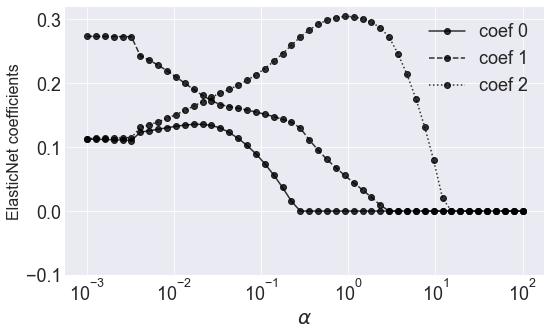

In [254]:
fig, ax = plt.subplots()
fig.set_size_inches((8, 5))
k = np.vstack(o)
ls = ['-', '--', ':', '-.']
for i in range(k.shape[1]):
    _ = ax.semilogx(
        alphas,
        k[:, i],
        'o-',
        label='coef %d' % (i),
        color='k',
        ls=ls[i],
        alpha=.8,
    )

_ = ax.axis(ymin=-1e-1)
_ = ax.legend(loc=0)
_ = ax.set_xlabel(r'$\alpha$', fontsize=20)
_ = ax.set_ylabel(r'ElasticNet coefficients', fontsize=16)
fig.tight_layout()

In [257]:
o_r = []
o_l = []
o_e = []
alphas = np.logspace(-3, 2, 50)
for a in alphas:
    clf_r = Ridge(alpha=a, fit_intercept=False).fit(X, y)
    o_r.append(clf_r.coef_)

    clf_l = Lasso(alpha=a, fit_intercept=False).fit(X, y)
    o_l.append(clf_l.coef_)
    
    clf_e = ElasticNet(alpha=a, fit_intercept=False).fit(X, y)
    o_e.append(clf_e.coef_)

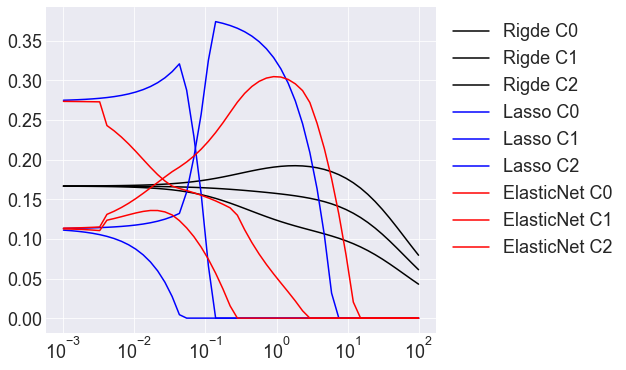

In [275]:
plt.figure(figsize=(7,6))

for i in range(3):
    plt.semilogx(alphas,np.vstack(o_r).T[i],color='k', label='Rigde C{}'.format(i))
    
for i in range(3):
    plt.semilogx(alphas,np.vstack(o_l).T[i],color='b', label='Lasso C{}'.format(i))
    
for i in range(3):
    plt.semilogx(alphas,np.vstack(o_e).T[i],color='r', label='ElasticNet C{}'.format(i))
    
plt.legend(bbox_to_anchor=(1,1))